## Sajid Mannan -- M3RG Lab -- Indian Institute of Technology, Delhi
## Date : 25December2022
## Purely data-driven machine learning model for glass hardness prediction ##


## Importing Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import sys
agrs = sys.argv
from functools import partial
import pandas as pd
import numpy as np
import MLPipeline as MLP
import os
import xgboost
import matplotlib
import shap
from new_plot import *
set_things()

In [3]:

X_train = pd.read_csv('1b_processed_data/04_Pipeline_Combined_Node_train_test_split_train_split_X.csv')
y_train = pd.read_csv('1b_processed_data/04_Pipeline_Combined_Node_train_test_split_train_split_y.csv')
X_test = pd.read_csv('1b_processed_data/04_Pipeline_Combined_Node_train_test_split_test_split_X.csv')
y_test = pd.read_csv('1b_processed_data/04_Pipeline_Combined_Node_train_test_split_test_split_y.csv')

In [4]:
import json
file2 = "2a_nn_results_CF16/00_Pipeline_Combined_Node_Data Normalization_means_and_stds.json"
ms_file = json.load(open(file2, "rb"))
import pickle
file_name = "2a_nn_results_CF16/01_Pipeline_Combined_Node_Optuna NN_Trial_148_10_model.pkl"
nn_model_loaded = pickle.load(open(file_name, "rb"))


In [5]:
P = MLP.Pipe(name="Combined", output="2b_nn_results_test")
P.add(MLP.data_cleaning.normalize_data(mean=ms_file["means"], std=ms_file["stds"]))  ##(x-mean)/(std)

X_train_N, y_train_N = P((X_train, y_train))
X_test_N, y_test_N = P((X_test, y_test))


Pipeline Combined is running

Node 0 running.
Node name:  Data Normalization

Pipeline Combined is running

Node 0 running.
Node name:  Data Normalization


In [6]:
import torch
from sklearn.metrics import r2_score

In [7]:
y_train_pred=nn_model_loaded(torch.tensor(X_train_N.values).float()).detach().numpy()
y_test_pred=nn_model_loaded(torch.tensor(X_test_N.values).float()).detach().numpy()


In [8]:
print("R2_train: %s, R2_test: %s"%(r2_score(y_train_N,y_train_pred),r2_score(y_test_N,y_test_pred)))

R2_train: 0.9222201204920235, R2_test: 0.8965853616577064


In [9]:
mean=ms_file["means"]
std=ms_file["stds"]
y_test_pred=nn_model_loaded(torch.tensor(X_test_N.values).float()).detach().numpy()
Y = mean[-1] + y_test_pred*std[-1]

In [10]:
mean=ms_file["means"]
std=ms_file["stds"]
y_train_pred=nn_model_loaded(torch.tensor(X_train_N.values).float()).detach().numpy()
Y_train = mean[-1] + y_train_pred*std[-1]

In [15]:
y1 = y_test.to_numpy()
y2 = Y
y1_train = y_train.to_numpy()
y2_train = Y_train
print(y2.shape, Y.shape, y1_train.shape,y2_train.shape)

(665, 1) (665, 1) (2656, 1) (2656, 1)


In [11]:
X_data_all= pd.concat([X_train_N,X_test_N], ignore_index = True)

In [12]:
X_data_all

,Si,O,Li,Na,K,Al,Mg,Ca,B,Ba,...,Tl,Er,In,Cd,Ag,Pr,Yb,C,Nd,LOAD
0,0.491948,0.256828,-0.395443,-0.210110,0.983947,1.718917,-0.401598,-0.367489,-0.538292,-0.236728,...,-0.052838,-0.048906,-0.071830,-0.113148,-0.034692,-0.057441,-0.061461,-0.04655,-0.05041,-0.530189
1,0.569247,0.231009,1.153883,-0.113312,0.035966,0.159794,-0.123898,-0.261152,-0.412726,-0.236728,...,-0.052838,-0.048906,-0.071830,-0.113148,-0.034692,-0.057441,-0.061461,-0.04655,-0.05041,0.267055
2,0.607423,0.185451,1.082652,0.045867,-0.143536,0.769821,-0.401598,-0.368383,-0.238112,-0.236728,...,-0.052838,-0.048906,-0.071830,-0.113148,-0.034692,0.609618,-0.061461,-0.04655,-0.05041,1.064300
3,-1.490366,-4.495888,-0.395443,-0.710848,-0.311234,-0.612173,-0.401598,-0.368383,-0.538292,-0.236728,...,-0.052838,-0.048906,-0.071830,-0.113148,-0.034692,-0.057441,-0.061461,-0.04655,-0.05041,-0.789294
4,-1.490366,-0.451729,2.695833,-0.710848,-0.311234,-0.612173,-0.401598,-0.368383,-0.538292,-0.236728,...,-0.052838,-0.048906,-0.071830,-0.113148,-0.034692,-0.057441,-0.061461,-0.04655,-0.05041,-0.131567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,-1.490366,0.178582,-0.395443,-0.710848,-0.311234,-0.612173,-0.401598,-0.368383,3.474032,-0.236728,...,-0.052838,-0.048906,-0.071830,-0.113148,-0.034692,-0.057441,-0.061461,-0.04655,-0.05041,-0.530189
3317,-1.490366,-4.495888,-0.395443,-0.710848,-0.311234,-0.612173,-0.401598,-0.368383,-0.538292,-0.236728,...,-0.052838,-0.048906,12.484838,-0.113148,-0.034692,-0.057441,-0.061461,-0.04655,-0.05041,-0.729500
3318,-1.177070,0.434401,-0.395443,-0.710848,-0.311234,-0.612173,-0.401598,-0.368383,0.302409,1.345286,...,-0.052838,-0.048906,-0.071830,-0.113148,-0.034692,-0.057441,-0.061461,-0.04655,-0.05041,-0.530189
3319,-1.418746,0.902772,-0.395443,-0.710848,-0.311234,-0.612173,-0.401598,-0.368383,-0.538292,-0.236728,...,-0.052838,-0.048906,-0.071830,-0.113148,-0.034692,-0.057441,-0.061461,-0.04655,-0.05041,-0.530189


In [13]:
X_data_all_a = mean[:-1] + X_data_all*std[:-1]

## Regression Plot

Text(0.5, 0, '$\\epsilon$')

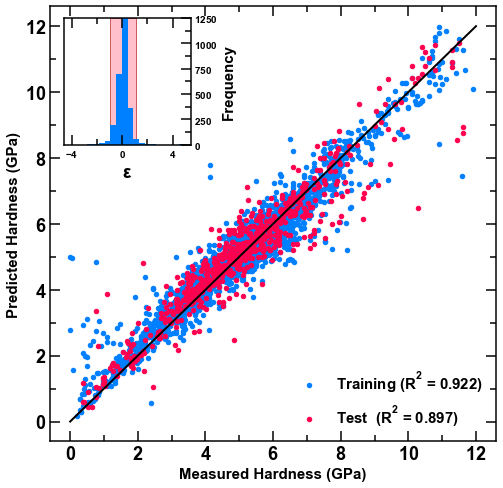

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#plt.figure(figsize=(8,8))
fig,ax1 = plt.subplots(figsize =(8,8))
ax1.scatter(y1_train,y2_train, s =20,color =['#007FFF'])
ax1.scatter(y1,y2, s =20,color =["#FF004F"])


ax1.legend(['Training ($R^2$ = 0.922)','Test  ($R^2$ = 0.897)'], loc = 'lower right',fontsize = 15)
# # Add axis labels
ax1.set_ylabel('Predicted Hardness (GPa)',fontsize = 15)
ax1.set_xlabel('Measured Hardness (GPa)', fontsize = 15)
plt.plot([0, 12], [0, 12],color='black') #label 
left, bottom, width, height = [0.15, 0.64, 0.22, 0.22]
ax2 = fig.add_axes([left, bottom, width, height])
std=np.std(y2_train-y1_train)
mean=np.mean(y2_train-y1_train)
xx=mean-2*std # 0.21-(2*std)
yy = 0
mean = np.mean(y2_train-y1_train)
rec = patches.Rectangle((xx,yy),4*std,1250, facecolor ='pink',edgecolor='indianred')
ax2.add_patch(rec)
y,x,__ = plt.hist(y2_train-y1_train, bins =20,color=['#007FFF'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
xlabel_ax2 = ax2.get_xticklabels()
ax2.yaxis.tick_right()
ax2.yaxis.set_tick_params(labelsize =10)
ax2.xaxis.set_tick_params(labelsize =10)
ax2.yaxis.set_label_position("right")
ax2.set_ylim(0,1250)
ax2.set_ylabel('Frequency',fontsize=15)
ax2.set_xlabel(r'$\epsilon$',fontsize=18)

# plt.savefig('regL.tif',format='tif', dpi=300)
# plt.show()

## Shap Analysis

In [17]:
feature_names = X_train.columns


In [18]:
import pickle
file_name = "2a_nn_results_CF16/01_Pipeline_Combined_Node_Optuna NN_Trial_148_10_model.pkl"
nn_model_loaded = pickle.load(open(file_name, "rb"))

In [21]:
back = torch.tensor(X_test.values).float()


In [22]:
import shap
explainer = shap.DeepExplainer(nn_model_loaded,back)
shap_values = explainer.shap_values(back)
#shap.summary_plot(back1[:3],plot_type='bar',feature_names=X_train.columns.to())

In [25]:
shap_values.shape[0]

665

In [26]:
vals = np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
colname = (feature_importance.iloc[:,0]).to_list()

In [27]:
## Maximum percentage of element in dataset
mm=[]
for i in colname:
    mm.append(max(X_train[i]))
    #print(max(X_test[i]))


print(mm)

[26.667, 37.9, 33.333, 71.959, 35.452, 9.8, 100.0, 40.0, 32.8, 84.0, 22.22, 18.75, 26.23, 26.417, 21.31, 26.967, 30.884, 40.0, 74.555, 52.8, 22.857, 27.66, 40.0, 10.526, 90.0, 16.667, 24.84, 19.127, 8.512, 9.508, 6.849, 27.5, 22.193, 16.933, 17.647, 30.435, 16.805, 11.029, 16.62, 6.067, 16.316, 14.286, 12.499, 13.333, 5.21, 23.44, 15.0, 9.167, 5.602, 12.821, 1.843, 15.385]


In [28]:
#ff = pd.DataFrame()
nn = []
for i in colname:
    pp = X_train.loc[:,i].astype(bool).sum(axis=0)
    nn.append(pp)
print(nn)

[506, 175, 2031, 2555, 1306, 2656, 53, 1006, 1159, 74, 538, 654, 448, 640, 253, 184, 228, 106, 107, 74, 111, 278, 161, 99, 51, 281, 185, 55, 155, 17, 74, 55, 347, 58, 27, 35, 24, 91, 91, 30, 15, 9, 42, 73, 79, 30, 18, 27, 9, 16, 11, 20]


In [29]:
import pandas as pd
lst1 = colname
lst2 = nn
lst3 = mm
important = pd.DataFrame(
    {'Element': lst1,
     'No_of_glasses%': lst2,
     'max%content': lst3
    })

In [30]:
# Use zip
res = [[i , j] for i, j in zip(nn, mm)]
# Result
print(colname)
print("The concatenated lists: ",res)

['Li', 'N', 'Si', 'O', 'Na', 'LOAD', 'Se', 'B', 'Al', 'Te', 'K', 'Mg', 'P', 'Ca', 'Zn', 'La', 'Pb', 'Ge', 'F', 'As', 'V', 'Ba', 'Sb', 'Nb', 'S', 'Zr', 'Sr', 'Mn', 'Fe', 'Nd', 'W', 'Bi', 'Ti', 'Cu', 'Gd', 'Ga', 'H', 'Cl', 'Y', 'Ta', 'Tl', 'Rb', 'Cd', 'Sn', 'Ce', 'Pr', 'In', 'Er', 'C', 'Sm', 'Ag', 'Yb']
The concatenated lists:  [[506, 26.667], [175, 37.9], [2031, 33.333], [2555, 71.959], [1306, 35.452], [2656, 9.8], [53, 100.0], [1006, 40.0], [1159, 32.8], [74, 84.0], [538, 22.22], [654, 18.75], [448, 26.23], [640, 26.417], [253, 21.31], [184, 26.967], [228, 30.884], [106, 40.0], [107, 74.555], [74, 52.8], [111, 22.857], [278, 27.66], [161, 40.0], [99, 10.526], [51, 90.0], [281, 16.667], [185, 24.84], [55, 19.127], [155, 8.512], [17, 9.508], [74, 6.849], [55, 27.5], [347, 22.193], [58, 16.933], [27, 17.647], [35, 30.435], [24, 16.805], [91, 11.029], [91, 16.62], [30, 6.067], [15, 16.316], [9, 14.286], [42, 12.499], [73, 13.333], [79, 5.21], [30, 23.44], [18, 15.0], [27, 9.167], [9, 5.602

In [31]:
kuchbhi = {name:j for name,j in zip(colname, res)}

In [32]:
feature_names=[f"{name} [{kuchbhi[name][0]}, {kuchbhi[name][1] :.2f}]" for name in X_train.columns.tolist()]

Text(0.5, 1.0, 'SHAP for Test data')

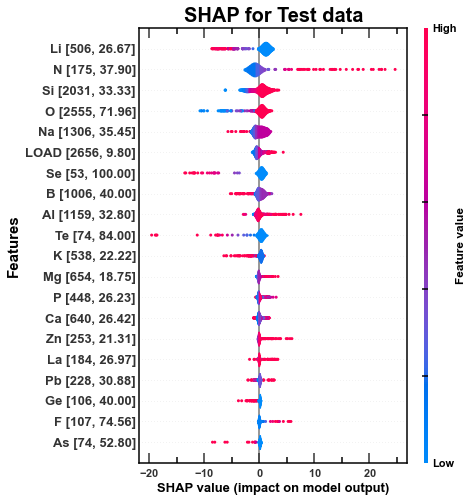

In [33]:
kuchbhi = {name:j for name,j in zip(colname, res)}

shap.summary_plot(shap_values, np.array(back),show = False, 
                  plot_type='violin',
                  feature_names=feature_names, 
                  max_display=20, 
                  color=plt.get_cmap("cool"),
                  plot_size=[6,8])
plt.ylabel('Features', fontsize = 15)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
# plt.xlim(-3, 3)
visible_ticks = {
   "top": True,
   
    
}
plt.tick_params(axis="x", which="both", **visible_ticks)
plt.tick_params(axis="y", which="both", **visible_ticks)
plt.title("SHAP for Test data")
#plt.savefig('Violin.tif',format='tif', dpi=300)
#plt.savefig('Shap Plots.png')

## SHAP for Network Forming 

In [37]:
f_nam = ['Sc','Be','Na','Li','Mg','Ca','Ba','La','Cu','Cs','Cd','Sr','Zn', 'Y'] # ne
ll = X_train.columns.to_list()
N = [i for i in range(len(ll)) if ll[i] in f_nam]
feature_names1=[f"{name} [{kuchbhi[name][0]}, {kuchbhi[name][1] :.2f}]" for name in X_test.iloc[:, N].columns.tolist()]

Text(0.5, 1.0, 'SHAP for Network Former')

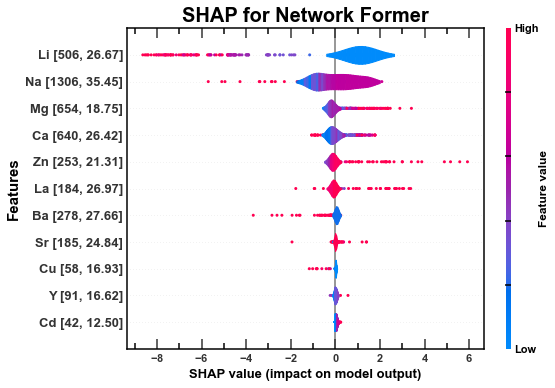

In [38]:
kuchbhi = {name:j for name,j in zip(colname, res)}

shap.summary_plot(shap_values[:,N], X_test.iloc[:, N],show = False, 
                  plot_type='violin',
                  feature_names=feature_names1)
plt.ylabel('Features', fontsize = 15)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
# plt.xlim(-3, 3)
visible_ticks = {
   "top": True,
   
    
}
plt.tick_params(axis="x", which="both", **visible_ticks)
plt.tick_params(axis="y", which="both", **visible_ticks)
plt.title("SHAP for Network Former")
# plt.savefig('violinL.tif',format='tif', dpi=300)

## Dataset Visualization

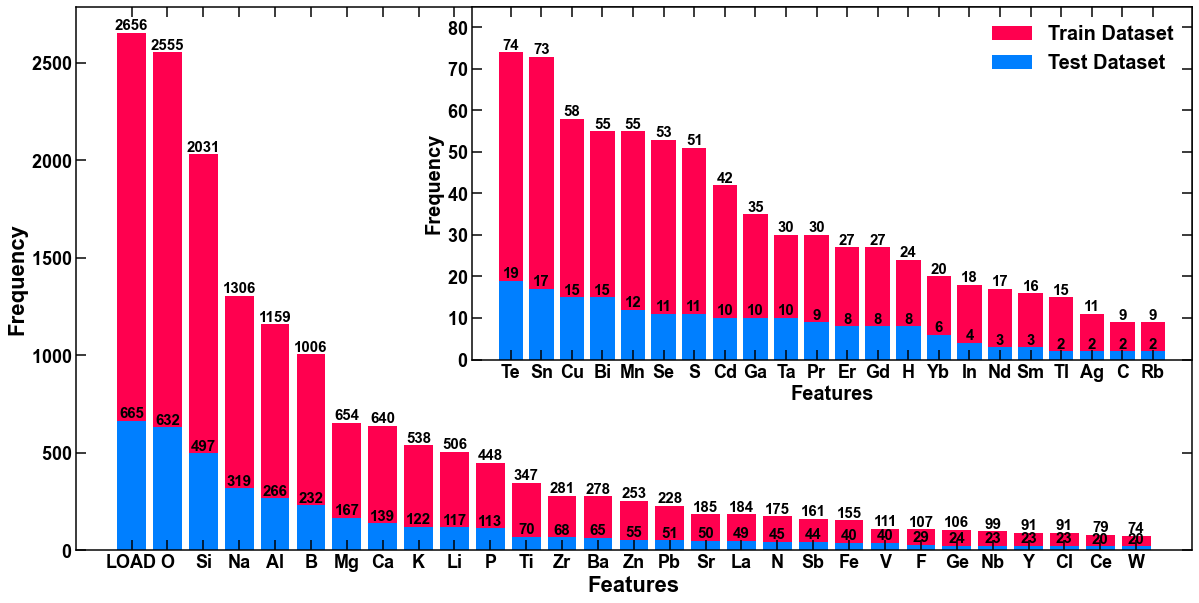

In [40]:
ff = pd.DataFrame(X_train.astype(bool).sum(axis=0).sort_values(ascending=False))
fft = pd.DataFrame(X_test.astype(bool).sum(axis=0).sort_values(ascending=False))
ff3= ff.values.tolist()
ff3t= fft.values.tolist()
ff2 = [ item for elem in ff3 for item in elem]
ff2t = [ item for elem in ff3t for item in elem]
#print('Flat List : ', ff2)
ff1 = []
for i in range(52):
    ff1.append(ff.index[i])    
ff1t = []
for i in range(52):
    ff1t.append(fft.index[i])

fig, ax1 = plt.subplots(figsize=(20,10))
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.4, 0.39, 0.5, 0.49]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.bar(ff1[:29], ff2[:29], color = ["#FF004F"])
ax1.bar(ff1[:29], ff2t[:29], color = ['#007FFF'])
ax1.minorticks_off()
ax1.margins(x=0.04)

ax2.minorticks_off()
ax2.margins(x=0.04)
for i in range(29):
    ax1.annotate(str(ff2[i]),xy=(ff1[i],ff2[i]),ha='center', va='bottom',fontsize = 15)
for i in range(29):
    ax1.annotate(str(ff2t[i]),xy=(ff1[i],ff2t[i]),ha='center', va='bottom',fontsize = 15)
ax1.set_xlabel('Features', fontsize = 22) 
ax1.set_ylabel('Frequency', fontsize = 22)


## Inset Plot
ax2.bar(ff1[-22:],ff2[-22:],color = ["#FF004F"])
ax2.bar(ff1[-22:],ff2t[-22:],color = ['#007FFF'])
for i in range(30,52):
    ax2.annotate(str(ff2[i]),xy=(ff1[i],ff2[i]),ha='center', va='bottom',fontsize = 15)
for i in range(30,52):
    ax2.annotate(str(ff2t[i]),xy=(ff1[i],ff2t[i]),ha='center', va='bottom',fontsize = 15)
ax2.set_xlabel('Features', fontsize = 20) 
ax2.set_ylabel('Frequency', fontsize = 20)
ax2.set_ylim(0,85)
ax2.legend(["Train Dataset","Test Dataset"])
# plt.savefiga('freqL.tif',bbox_inches='tight',format='tif', dpi=300, pad_inches = 0)

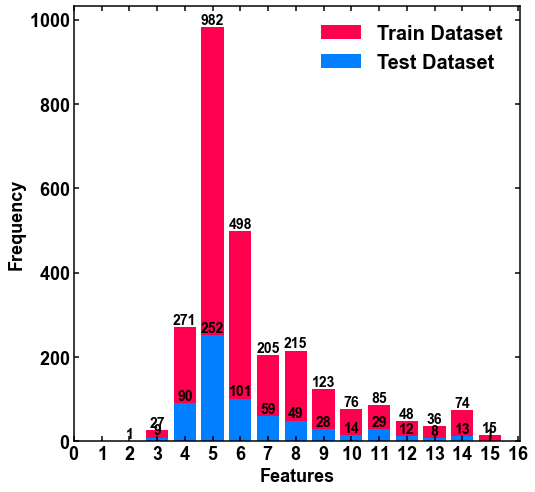

In [41]:
zz_test = pd.DataFrame(X_test.astype(bool).sum(axis=1).value_counts())
zz_train = pd.DataFrame(X_train.astype(bool).sum(axis=1).value_counts())
zz3_test= zz_test.values.tolist()
zz3_train= zz_train.values.tolist()
zz2_test = [ i for e in zz3_test for i in e]
zz2_train = [ i for e in zz3_train for i in e]

zz1_test = []
for i in range(zz_test.shape[0]):
    zz1_test.append(zz_test.index[i])
zz1_train = []
for i in range(zz_train.shape[0]):
    zz1_train.append(zz_train.index[i])

plt.figure(figsize=(8,8))
plt.bar(zz1_train, zz2_train, color=["#FF004F"])
plt.bar(zz1_test, zz2_test, color = ['#007FFF'])

for i in range(len(zz2_train)):
    plt.annotate(str(zz2_train[i]),xy=(zz1_train[i],zz2_train[i]),ha='center', va='bottom',fontsize = 14)
for i in range(len(zz2_test)):
    plt.annotate(str(zz2_test[i]),xy=(zz1_test[i],zz2_test[i]),ha='center', va='bottom', fontsize = 14)

plt.xlabel('Features', fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
#plt.ylim(0, 300)
plt.xticks(ticks=np.arange(0,17))

plt.tick_params(axis="x", which="both", size = 5)
plt.tick_params(axis="y", which="both", size = 5)
plt.minorticks_off()
plt.legend(["Train Dataset","Test Dataset"])
# plt.savefig('distL.tif',bbox_inches='tight',format='tif', dpi=300, pad_inches = 0)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

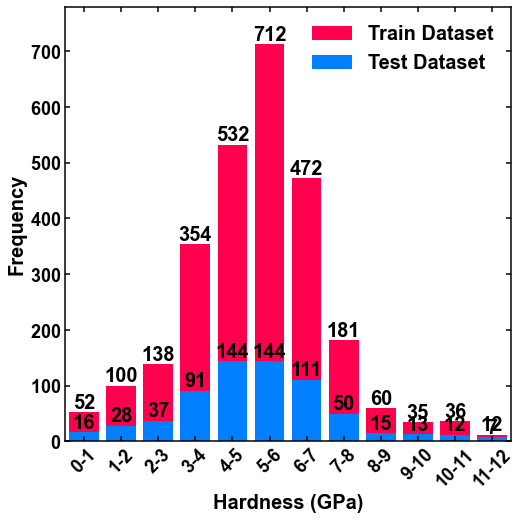

In [42]:
xx = []
for i in range(0,12):
    xx.append(str(i) + '-' + str(i+1))
s = y_test['HARDNESS']
s1 = y_train['HARDNESS']
p_test = []
for i in range(0,12):
    p_test.append(s.between(i,i+1).sum())
p_train = []
for i in range(0,12):
    p_train.append(s1.between(i,i+1).sum())  



plt.figure(figsize=(8,8))
plt.bar(xx, p_train,linewidth=1, color=["#FF004F"])
plt.bar(xx, p_test,linewidth=1, color = ['#007FFF'])
ind = np.arange(len(xx))
for i in range(len(p_test)):
    plt.annotate(str(p_test[i]),xy=(ind[i],p_test[i]),ha='center', va='bottom',fontsize = 20) 
for i in range(len(p_train)):
    plt.annotate(str(p_train[i]),xy=(ind[i],p_train[i]),ha='center', va='bottom',fontsize = 20)
plt.xlabel("Hardness (GPa)", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.xticks(ticks=np.arange(0,13))
plt.minorticks_off()
plt.legend(["Train Dataset","Test Dataset"],fontsize = 20)
plt.tick_params(axis="x", which="both", size = 5)
plt.tick_params(axis="y", which="both", size = 5)
plt.margins(0.01)
plt.ylim([0,780])
#plt.figure(figsize=(8,8))
plt.xticks(rotation = 45)
#plt.savefig('histL.tif',bbox_inches='tight',format='tif', dpi=300, pad_inches = 0)